In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')

# Optimal width plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
import os
from importlib import reload
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [3]:
def load_opt_w_data(names_of_lines):

    data = {}
    for name in names_of_lines:  

        data[f"A_area_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_area_{name}", name)
        )
        data[f"A_wavl_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_wavl_{name}", name)
        )
        data[f"Deltas_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"Deltas_{name}", name)
        )


    return data



lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

reload(un)
data = load_opt_w_data(lines)
# disgard_cont_point("CaK17", data)
data.keys()

dict_keys(['A_area_Ha17', 'A_wavl_Ha17', 'Deltas_Ha17', 'A_area_CaK17', 'A_wavl_CaK17', 'Deltas_CaK17', 'A_area_CaII17', 'A_wavl_CaII17', 'Deltas_CaII17'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12116\976252686.py:14: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


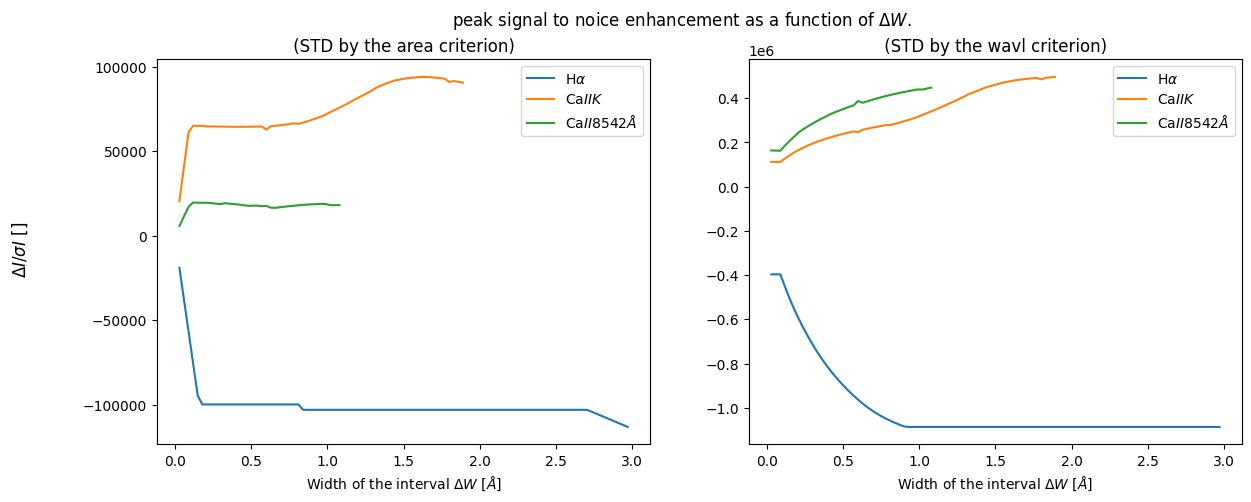

In [4]:
def plot_peak_enhancement(data, names_of_lines, long_names):
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))
    fig.suptitle(r'peak signal to noice enhancement as a function of $\Delta W$.')
    fig.supylabel(r'$\Delta I/\sigma I$ []')
    ax_peak_enhancement(ax[0], data, names_of_lines, long_names, criterion='area')
    ax_peak_enhancement(ax[1], data, names_of_lines, long_names, criterion='wavl')
    plt.show()
    
    
def ax_peak_enhancement(ax, data, names_of_lines, long_names, criterion):
    for name in names_of_lines:
        A = data[f"A_area_{name}"] if criterion=="area" else data[f"A_wavl_{name}"]
        Deltas = data[f"Deltas_{name}"]
        MAX = np.nanmax(A, axis=1)
        ax.plot(Deltas, MAX, label=long_names[name])
        ax.set_title(f' (STD by the {criterion} criterion) ')
        ax.set_xlabel(r"Width of the interval $\Delta W$ $[\AA]$")

    ax.legend()

plot_peak_enhancement(data, lines, long_names)

In [5]:
# Full_line_ana(fig, ax, names_of_lines_list, scalefactor, name_of_flare='', name_of_show_line=None, data=None):
# if data is None:
#         data = get_data(names_of_lines_list)
#     for i, name in enumerate(names_of_lines_list):
#         wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, 
#                                                           area_factor=area_factor*scalefactor, normal=True, add_noise=False)
        
        
# def contrast_FOV_data(name_of_line, data, quiet_sun_subtraction=True, num=100, normal=True, scale_pix_to_saas=1/53.4):
#     return wav, DFOV*corr , time, line, std*corr


In [6]:

def stn_direct(weight_func, wav, DI, std):
    """_summary_

    Args:
        DI ((n_time, n_wav)-numpy array): difference intencity 
        std ((n_wav)-numpy array): the standard deviations for the standard deviations
        weight_func (function): A function returning the weight at any wavelength. 
        wav ((n_wav)-numpy array): the wavelength positions of the diff_spectr observations | (float)- the averaged std over the wavelengths. 

    Returns:
        (n_time)-arr: int (I(t,w)/std(w)) * g(w) array containing the weighted signal to noise ratio for the provided weights. 
    """
    weights = weight_func_to_weights(weight_func, wav)
    DS = DI / std
    return np.dot(DS, weights) # check if this is in the right order. 


def weight_func_to_weights(weight_func, wav):
    n = len(wav)
    def i_unit_weight(i):
        v = np.zeros(n)
        v[i] = 1
        f = lambda w : interp1d(wav,v)(w) * weight_func(w)
        return quad(f, wav[0], wav[-1])[0]
    return np.array([i_unit_weight(i) for i in range(n)])

# def weight_func_to_weights(weight_func, wav):
#     n = len(wav)
#     def i_unit_weight(i):
#         v = np.zeros(n)
#         v[i] = 1
#         f = lambda w : interp1d(wav,v)(w) * weight_func(w)
#         print(quad(f, wav[0], wav[-1])[0], f(wav[i]), weight_func(wav[i]))
#         return quad(f, wav[0], wav[-1])[0]
#     return np.array([i_unit_weight(i) for i in range(n)])
# possible weight functions 
def indicator_function(a,b):
    return lambda x : np.where(x > a, 1,0) * np.where( x < b ,  1, 0)

In [7]:
def get_data(lines):
    data = un.load_for_further_analysis(lines, un.get_full_path(lines[0]))
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 


lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

data = get_data(lines)


### loading data

# Important: if we take differnce_FD_data compared to conterast_FD -1 we will have NOT the same (the troughs in the latter are more intensified as the std is accounting for the scaling so 1/ s * s**0.5 != 1)

In [8]:
reload(un2)

<module 'use_nessi2' from 'E:\\solar flares/data/2017-09-06\\use_nessi2.py'>

[[6.56131879e+03 6.56181879e+03 6.56201879e+03 6.56221879e+03
  6.56251879e+03 6.56266879e+03 6.56281879e+03 6.56296879e+03
  6.56311879e+03 6.56341879e+03 6.56361879e+03 6.56381879e+03
  6.56431879e+03]
 [8.18242360e-01 7.69945519e-01 7.29005290e-01 6.10015586e-01
  2.63634766e-01 2.21668118e-01 2.11332035e-01 2.25095888e-01
  2.74499943e-01 5.75517177e-01 6.91757808e-01 7.55231210e-01
  7.94790538e-01]
 [2.35866216e-11 2.00257019e-11 1.53225653e-11 1.11489646e-11
  6.50288500e-12 6.28701731e-12 7.06594271e-12 8.03571525e-12
  1.01892475e-11 1.41000247e-11 1.93796519e-11 1.97392394e-11
  2.42270082e-11]]


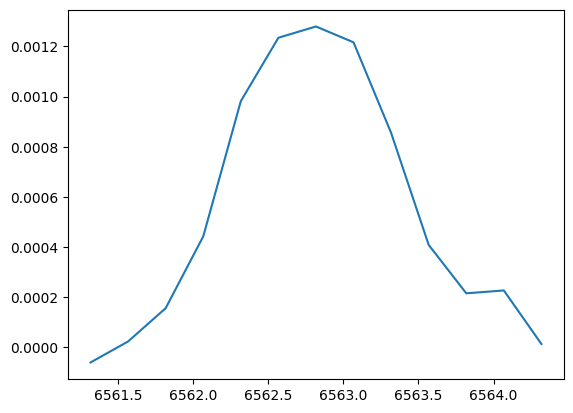

[2.41380733e-14 2.23159868e-14 2.04939003e-14 1.46130108e-14
 9.82472462e-15 6.58128327e-15 7.23114339e-15 9.69284354e-15
 1.30956112e-14 1.84819804e-14 2.02007406e-14 2.24970863e-14
 2.47934321e-14]


array([1.41813387e+11, 1.38371394e+11, 1.47393630e+11, 1.59023985e+11,
       1.69415180e+11, 1.84103624e+11, 1.80345385e+11, 1.80652754e+11,
       1.88578972e+11, 1.88265631e+11, 1.88352791e+11, 1.87058435e+11,
       1.94040211e+11, 1.95425772e+11, 1.97286579e+11, 2.03394272e+11,
       2.14162912e+11, 2.20861919e+11, 2.22142232e+11, 2.33874404e+11,
       2.39470706e+11, 2.42780927e+11, 2.41876870e+11, 2.41309864e+11,
       2.41552027e+11, 2.40409143e+11, 2.41689470e+11, 2.40065401e+11,
       2.38781050e+11, 2.36078836e+11, 2.34121735e+11, 2.33214101e+11,
       2.33473393e+11, 2.32254865e+11, 2.33193340e+11, 2.30423249e+11,
       2.26951210e+11, 2.22008910e+11, 2.19957338e+11, 2.18954648e+11,
       2.16734910e+11, 2.13116862e+11, 2.07455319e+11, 2.05095203e+11,
       2.00912407e+11, 1.96501974e+11, 1.92084820e+11, 1.90081825e+11,
       1.87035942e+11, 1.85800208e+11, 1.83372968e+11, 1.80995976e+11,
       1.78361700e+11, 1.76180374e+11, 1.72447823e+11, 1.72305967e+11,
      

In [31]:
scalefactor = 2.4
name = "Ha17"

print(data[f"quiet_sun_{name}"])

wav, DFD , time, line_nessi, std = un2.difference_FD_data(name,data, quiet_sun_subtraction=False, num=-1,
                                                          area_factor=60**2/np.pi/959.63**2*scalefactor, add_noise=False)
plt.plot(wav, DFD[5])
plt.show()
weight_func = indicator_function(6561.3490928 , 6564.28848698)

print(std)
stn_direct(weight_func, wav, DFD, std)


### calculation signal to noise ratio in time for a given weight function

In [10]:
weights = weight_func_to_weights(weight_func, wav)
DS = DFD / std

stn = np.dot(DS, weights)

DS, weights, wav, np.shape(DS), np.shape(DFD), np.shape(std),  np.shape(time), np.shape(stn)


(array([[-1.39815011e+08, -9.04920997e+07,  1.22404181e+07, ...,
          4.39300167e+07,  5.75981904e+07, -1.01245073e+08],
        [-1.38405952e+08, -8.93456553e+07,  1.30775508e+07, ...,
          5.62965567e+07,  7.24938269e+07, -8.42888249e+07],
        [-1.21917874e+08, -6.70855644e+07,  4.21360194e+07, ...,
          7.79498013e+07,  8.94704908e+07, -7.11224602e+07],
        ...,
        [-4.25120884e+08, -4.13415356e+08, -3.54989248e+08, ...,
         -3.85672483e+08, -3.11230206e+08, -4.20557054e+08],
        [-4.24439341e+08, -4.13563422e+08, -3.56114442e+08, ...,
         -3.84448930e+08, -3.08753822e+08, -4.17059910e+08],
        [-4.27528072e+08, -4.14031856e+08, -3.53496644e+08, ...,
         -3.88061277e+08, -3.09826424e+08, -4.16063226e+08]]),
 array([0.09653353, 0.24816347, 0.25000002, 0.25000002, 0.25000002,
        0.25000002, 0.25000002, 0.25000002, 0.25000002, 0.25000002,
        0.25000002, 0.24816347, 0.09653353]),
 array([6561.31878977, 6561.56878979, 6561.8187

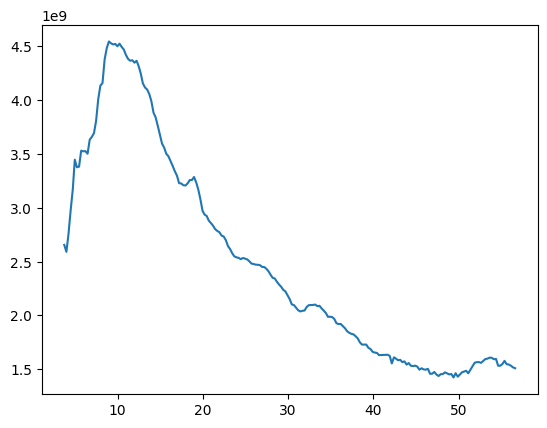

In [11]:
plt.plot(time, stn)

### Lower threshold for detection cutt off

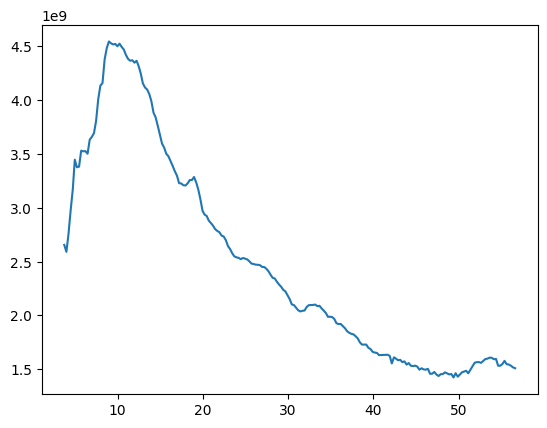

In [12]:
def lower_threshold_cutoff(t, a):
    """cut off array under thershold

    Args:
        t (fl): lower threshold
        a (arr): input array
    """
    return np.where(a > t, a, 0)

t = 1e7 # for example

stnl = lower_threshold_cutoff(t, stn)
plt.plot(time, stnl)

### different meassures:
#### given a specific timelength C



In [13]:
timestep  = (time[-1] - time[0]) / (len(time) - 1)
timestep

0.24944968553459115

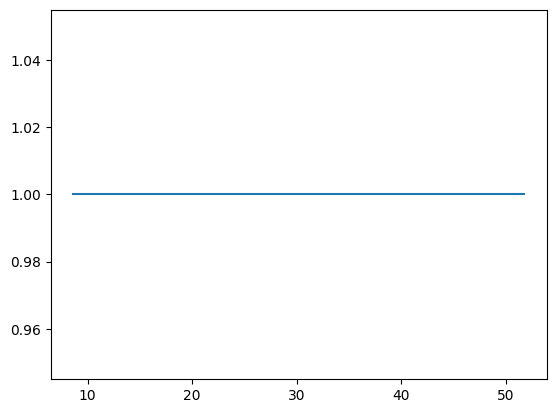

In [14]:
C = 10 #example
N = round(C / timestep)

# measure 0:
stn0 = np.where(stnl >0, 1, 0)
stn0 = np.convolve(stn0, np.ones(N)/N, mode='valid')
time0 = np.convolve(time, np.ones(N)/N, mode='valid')

plt.plot(time0, stn0)

In [15]:
def max_rolling(A,K):
    return np.array([max(A[j:j+K]) for j in range(len(A)-K)])

alpha = 0 the measure yields 1.0000000000000002
alpha = 0.1 the measure yields 2391636657.0031924
alpha = 1 the measure yields 2545536913.3380184
alpha = 3 the measure yields 2891475635.8017974
alpha = 10 the measure yields 3608051043.5710306
alpha = 20 the measure yields 3964335438.212195
alpha = 1000 the measure yields inf
alpha = inf the measure yields 4546459301.237708


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12116\268705007.py:14: RuntimeWarning: overflow encountered in power
  stn_alpha = stn ** alpha


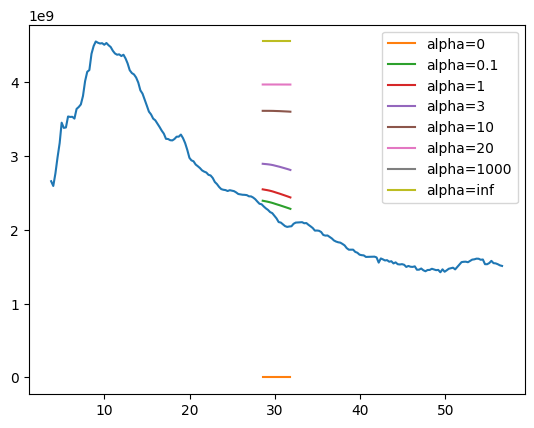

In [16]:
# finite measure
def measure(alpha, stn, time, C=10, plot=False):
    timestep  = (time[-1] - time[0]) / (len(time) - 1)
    N = round(C / timestep)

    if alpha == 0:
        stn_alpha = np.where(stn >0, 1, 0)
        stn_alpha = np.convolve(stn_alpha, np.ones(N)/N, mode='valid')
        
    elif alpha == np.inf:
        stn_alpha = max_rolling(stn, N-1)
        
    else:
        stn_alpha = stn ** alpha
        stn_alpha = np.convolve(stn_alpha, np.ones(N)/N, mode='valid') ** (1 / alpha)
    
    time_alpha = np.convolve(time, np.ones(N)/N, mode='valid')

    if plot:
        plt.plot(time_alpha, stn_alpha, label = f'alpha={alpha}')
    return np.max(stn_alpha)


def measure_non_convolved(alpha, stn, time=None, cutoff=0, plot=False):
    """Same measure as before but now for practical applications we take C = lengt of observation, 
    i.e. only pass on most interesting option of higher alpha"""

    if alpha == 0:
        stn_alpha = np.where(stn > cutoff, 1, 0)
        
    elif alpha == np.inf:
        stn_alpha = np.max(alpha)
        
    else:
        stn_alpha = stn ** alpha
    
    if plot:
        if time is None:
            time = np.range(len(stn_alpha))
        plt.plot(time, stn_alpha, label = f'alpha={alpha}')
        
    return np.max(stn_alpha)

plt.plot(time, stnl)
for i in [0,0.1,1,3,10,20,1000,np.inf]:
    print(f"alpha = {i} the measure yields {measure(i, stn, time, C= 50, plot=True)}")
    

plt.legend()

In [17]:
measure(100, stnl, time)


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12116\268705007.py:14: RuntimeWarning: overflow encountered in power
  stn_alpha = stn ** alpha


inf

## optimazation for a specific filter

1. For a fixed measure the behaviour of a parameter-family of filter functions

In [26]:
# possible weight/filter functions 
def indicator_function(a,b):
    """indicator_function on the domain [a,b]"""
    return lambda x : np.where(x > a, 1,0) * np.where( x < b ,  1, 0)

def weights_indicators_functions(linecenter, line_widths):
    return [indicator_function(linecenter - line_width / 2 , linecenter+ line_width / 2) for line_width in line_widths]

def triangle(a,b,c,h):
    """Triangle with base a, b, c and hight h above b """
    return lambda x: np.where(x > a , (x-a) * h/ (b-a) , 0)* np.where( x < b ,  1, 0) + \
            np.where(x > b  , (x-c) * - h / (c-b) , 0)* np.where( x < c ,  1, 0)

def gaussian(amp_g, cen_g, sigma_g):
    """Gaussian function."""
    return lambda x : amp_g * np.exp(-(x - cen_g)**2 / (2 * sigma_g**2))

Measure is the $\alpha=3$ measure!

In [19]:
weight_func = indicator_function(6561.3490928 , 6564.28848698)

widths = np.logspace(np.log(0.2), np.log(2.5), 20)
m3 = []
m1 = []
m2 = []
minf = []

for weight_func in weights_indicators_functions(6563, widths):
    m3.append(measure(3, stn_direct(weight_func, wav, DFD, std), time, C=50))
    m1.append(measure(1, stn_direct(weight_func, wav, DFD, std), time, C=50))
    m2.append(measure(2, stn_direct(weight_func, wav, DFD, std), time, C=50))
    minf.append(measure(np.inf, stn_direct(weight_func, wav, DFD, std), time, C=50))




C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12116\1690548313.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f, wav[0], wav[-1])[0]


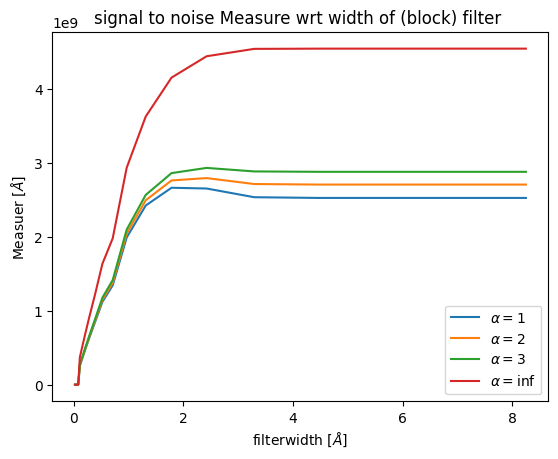

the optimal width for measure alpha = 1 is [1.78494689]
the optimal width for measure alpha = 2 is [2.42414384]
the optimal width for measure alpha = 3 is [2.42414384]
the optimal width for measure alpha = inf is [4.47120476 6.07236188 8.24690007]


In [20]:
fig, ax = plt.subplots()
ax.plot(widths, m1, label=r"$\alpha=1$")
ax.plot(widths, m2, label=r"$\alpha=2$")
ax.plot(widths, m3, label=r"$\alpha=3$")
ax.plot(widths, minf, label=r"$\alpha=\inf$")
ax.set_title("signal to noise Measure wrt width of (block) filter ")
ax.set_xlabel("filterwidth [$\AA$]")
ax.set_ylabel("Measuer [$\AA$]")
plt.legend()
plt.show()

print(f"the optimal width for measure alpha = 1 is {widths[np.where(m1 == np.max(m1))[0]]}")
print(f"the optimal width for measure alpha = 2 is {widths[np.where(m2 == np.max(m2))[0]]}")
print(f"the optimal width for measure alpha = 3 is {widths[np.where(m3 == np.max(m3))[0]]}")
print(f"the optimal width for measure alpha = inf is {widths[np.where(minf == np.max(minf))[0]]}")

### same with altered characteristic length

In [21]:
weight_func = indicator_function(6561.3490928 , 6564.28848698)

widths = np.logspace(np.log(0.8), np.log(1.2), 20)
m3 = []
m1 = []
m2 = []
minf = []

C = 53
for weight_func in weights_indicators_functions(6563, widths):
    m3.append(measure_non_convolved(3, stn_direct(weight_func, wav, DFD, std), time))
    m1.append(measure_non_convolved(1, stn_direct(weight_func, wav, DFD, std), time))
    m2.append(measure_non_convolved(2, stn_direct(weight_func, wav, DFD, std), time))
    minf.append(measure_non_convolved(np.inf, stn_direct(weight_func, wav, DFD, std), time))




C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12116\1690548313.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f, wav[0], wav[-1])[0]


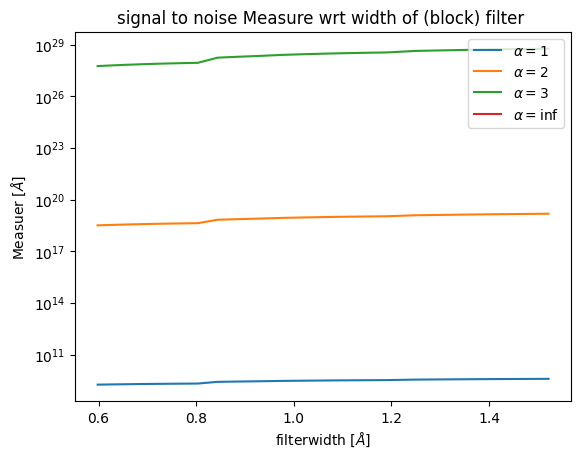

the optimal width for measure alpha = 1 is [1.52167378]
the optimal width for measure alpha = 2 is [1.52167378]
the optimal width for measure alpha = 3 is [1.52167378]
the optimal width for measure alpha = inf is [0.59821383 0.62834291 0.65998944 0.69322985 0.72814442 0.76481746
 0.80333754 0.84379769 0.88629561 0.93093395 0.9778205  1.02706849
 1.07879686 1.13313054 1.19020073 1.25014527 1.31310892 1.37924373
 1.44870943 1.52167378]


In [45]:
fig, ax = plt.subplots()
ax.plot(widths, m1, label=r"$\alpha=1$")
ax.plot(widths, m2, label=r"$\alpha=2$")
ax.plot(widths, m3, label=r"$\alpha=3$")
ax.plot(widths, minf, label=r"$\alpha=\inf$")
ax.set_title("signal to noise Measure wrt width of (block) filter ")
ax.set_xlabel("filterwidth [$\AA$]")
ax.set_ylabel("Measuer [$\AA$]")
ax.set_yscale('log')

plt.legend()
plt.show()

print(f"the optimal width for measure alpha = 1 is {widths[np.where(m1 == np.max(m1))[0]]}")
print(f"the optimal width for measure alpha = 2 is {widths[np.where(m2 == np.max(m2))[0]]}")
print(f"the optimal width for measure alpha = 3 is {widths[np.where(m3 == np.max(m3))[0]]}")
print(f"the optimal width for measure alpha = inf is {widths[np.where(minf == np.max(minf))[0]]}")

In [23]:
widths

array([0.59821383, 0.62834291, 0.65998944, 0.69322985, 0.72814442,
       0.76481746, 0.80333754, 0.84379769, 0.88629561, 0.93093395,
       0.9778205 , 1.02706849, 1.07879686, 1.13313054, 1.19020073,
       1.25014527, 1.31310892, 1.37924373, 1.44870943, 1.52167378])

2. use fitting to determin optimal parameters. (best to take the C equal to the lengt of less calculation.)

still for $\alpha = 3$

In [40]:
def plot_filter(filter, wav, line_nessi, xlim=None):
    if xlim is None:
        xlim = np.min(wav), np.max(wav)
    fig, ax = plt.subplots()
    ax.plot(wav, line_nessi, label="Full Disk line profile")
    x = np.linspace(xlim[0], xlim[1], 30)
    ax.plot(x, filter(x), "--", label="filter")
    plt.legend()
    plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12116\1690548313.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f, wav[0], wav[-1])[0]


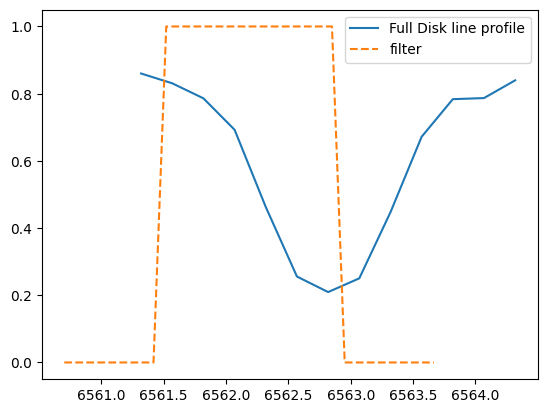

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -3.7142155554725423e+33
        x: [ 6.562e+03  1.482e+00]
      nit: 2
      jac: [-7.501e+33 -4.243e+33]
 hess_inv: [[-9.294e-13  3.781e-12]
            [ 2.165e-12 -8.807e-12]]
     nfev: 54
     njev: 18

In [46]:
from scipy.optimize import minimize

alpha = 3

fun = lambda param :  - measure_non_convolved(alpha, 
                                              stn_direct(indicator_function(param[0] - param[1] / 2 , param[0]+ param[1] / 2), wav, DFD, std))

initial_guess = (6563 , 0.1)

mini = minimize(fun, initial_guess)
param = mini['x']
plot_filter(indicator_function(param[0] - param[1] / 2 , param[0]+ param[1] / 2), wav, line_nessi, 
            xlim=(param[0] - param[1] , param[0]+ param[1]))

mini

So the optimal width for the alpha = 3  measure is 4.408 for a blockfilter with center 6563

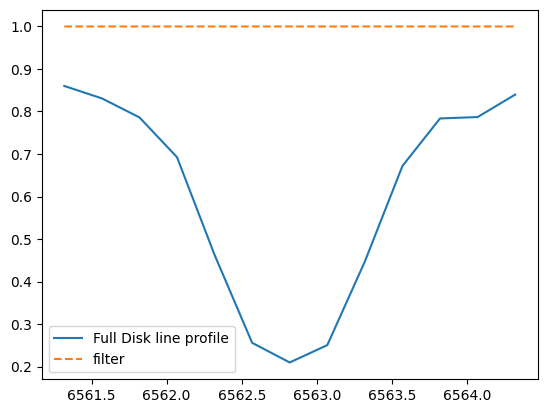

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1.4374377582345725e+34
        x: [ 6.566e+03  4.722e+02]
      nit: 28
      jac: [ 5.729e+29 -3.714e+27]
 hess_inv: [[ 2.750e-34  7.141e-40]
            [ 7.141e-40  1.154e-37]]
     nfev: 144
     njev: 48

In [42]:
alpha = 3
# from functools import partial


fun = lambda param :  - measure_non_convolved(alpha, 
                                              stn_direct(gaussian(1, param[0], param[1]), wav, DFD, std))

initial_guess = (6563 , 1)

mini = minimize(fun, initial_guess)
param = mini['x']
plot_filter(gaussian(1, param[0], param[1]), wav, line_nessi)
mini

In [32]:
alpha = 3

fun = lambda param :  - measure_non_convolved(alpha, 
                                              stn_direct(triangle( param[0] , param[1], param[2], 1), wav, DFD, std))

initial_guess = (6561, 6563 , 6565)

mini = minimize(fun, initial_guess)
param = mini['x']
plot_filter(triangle( param[0] , param[1], param[2], 1), wav, line_nessi, xlim=(param[0], param[2]))
mini

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1.083247853734858e+34
        x: [ 6.560e+03  6.563e+03  6.569e+03]
      nit: 5
      jac: [ 6.826e+32  1.346e+33 -2.649e+32]
 hess_inv: [[ 5.335e-34 -3.971e-34  3.149e-33]
            [-1.327e-33  4.421e-34 -1.780e-33]
            [ 1.045e-32 -2.689e-33  1.619e-32]]
     nfev: 52
     njev: 10

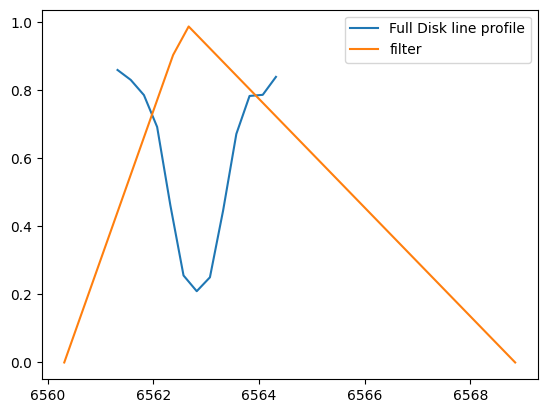